In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
%cd /content/gdrive/My Drive/test-2

/content/gdrive/My Drive/test-2


In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 736M/745M [00:18<00:00, 25.9MB/s]
100% 745M/745M [00:18<00:00, 42.0MB/s]


In [ ]:
!unzip \covid_test2.zip && rm covid_test2.zip

Streaming output truncated to the last 5000 lines.
  inflating: covid_test/training/normal/Normal-7995.png  
  inflating: covid_test/training/normal/Normal-7996.png  
  inflating: covid_test/training/normal/Normal-7997.png  
  inflating: covid_test/training/normal/Normal-8.png  
  inflating: covid_test/training/normal/Normal-80.png  
  inflating: covid_test/training/normal/Normal-800.png  
  inflating: covid_test/training/normal/Normal-8000.png  
  inflating: covid_test/training/normal/Normal-8001.png  
  inflating: covid_test/training/normal/Normal-8003.png  
  inflating: covid_test/training/normal/Normal-8004.png  
  inflating: covid_test/training/normal/Normal-8005.png  
  inflating: covid_test/training/normal/Normal-8006.png  
  inflating: covid_test/training/normal/Normal-8007.png  
  inflating: covid_test/training/normal/Normal-8008.png  
  inflating: covid_test/training/normal/Normal-8009.png  
  inflating: covid_test/training/normal/Normal-801.png  
  inflating: covid_test/trai

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from shutil import copyfile
import random

In [ ]:
%tensorflow_version 2.x
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.5.0
Found GPU at: /device:GPU:0


to_create = ['/content/gdrive/My Drive/covid',
             '/content/gdrive/My Drive/covid/training',
             '/content/gdrive/My Drive/covid/testing',
             '/content/gdrive/My Drive/covid/validating',
             '/content/gdrive/My Drive/covid/training/covid',
             '/content/gdrive/My Drive/covid/training/lung_opacity',
             '/content/gdrive/My Drive/covid/training/normal',
             '/content/gdrive/My Drive/covid/training/viral',
             '/content/gdrive/My Drive/covid/testing/covid',
             '/content/gdrive/My Drive/covid/testing/lung_opacity',
             '/content/gdrive/My Drive/covid/testing/normal',
             '/content/gdrive/My Drive/covid/testing/viral',
             '/content/gdrive/My Drive/covid/validating/covid',
             '/content/gdrive/My Drive/covid/validating/lung_opacity',
             '/content/gdrive/My Drive/covid/validating/normal',
             '/content/gdrive/My Drive/covid/validating/viral']

for directory in to_create :
  try : 
    os.mkdir(directory)
    print(directory,"created")
  except:
    print(directory,"failed")

def split_data(SOURCE, TRAINING, TESTING,VALIDATING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:-int((1-split_point)/2)]
    val_set = shuffled[-int((1-split_point)/2):]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)
    for file_name in test_set:
        copyfile(SOURCE + file_name, VALIDATING + file_name)

COVID_SOURCE_DIR = '/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/COVID/'
LUNG_SOURCE_DIR = '/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Lung_Opacity/'
NORMAL_SOURCE_DIR ='/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Normal/'
VIRAL_SOURCE_DIR = '/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Viral_Pneumonia/'

TRAINING_COVID_DIR = '/content/gdrive/My Drive/covid/training/covid/'
TESTING_COVID_DIR= '/content/gdrive/My Drive/covid/testing/covid/'
VAL_COVID_DIR =  '/content/gdrive/My Drive/covid/validating/covid/'

TRAINING_LUNG_DIR ='/content/gdrive/My Drive/covid/training/lung_opacity/' 
TESTING_LUNG_DIR= '/content/gdrive/My Drive/covid/testing/lung_opacity/'
VAL_LUNG_DIR ='/content/gdrive/My Drive/covid/validating/lung_opacity/'

TRAINING_NORMAL_DIR = '/content/gdrive/My Drive/covid/training/normal/'
TESTING_NORMAL_DIR= '/content/gdrive/My Drive/covid/testing/normal/' 
VAL_NORMAL_DIR = '/content/gdrive/My Drive/covid/validating/normal/'

TRAINING_VIRAL_DIR ='/content/gdrive/My Drive/covid/training/viral/' 
TESTING_VIRAL_DIR= '/content/gdrive/My Drive/covid/testing/viral/' 
VAL_VIRAL_DIR = '/content/gdrive/My Drive/covid/validating/viral/'

split_size = .8
split_data(COVID_SOURCE_DIR, TRAINING_COVID_DIR, TESTING_COVID_DIR, VAL_COVID_DIR, split_size)
split_data(LUNG_SOURCE_DIR, TRAINING_LUNG_DIR, TESTING_LUNG_DIR, VAL_LUNG_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, VAL_NORMAL_DIR, split_size)
split_data(VIRAL_SOURCE_DIR, TRAINING_VIRAL_DIR, TESTING_VIRAL_DIR, VAL_VIRAL_DIR, split_size)


In [ ]:
list_folder_tmp = ['/content/gdrive/My Drive/covid_test/training/covid',
             '/content/gdrive/My Drive/covid_test/training/lung_opacity',
             '/content/gdrive/My Drive/covid_test/training/normal',
             '/content/gdrive/My Drive/covid_test/training/viral',
             '/content/gdrive/My Drive/covid_test/testing/covid',
             '/content/gdrive/My Drive/covid_test/testing/lung_opacity',
             '/content/gdrive/My Drive/covid_test/testing/normal',
             '/content/gdrive/My Drive/covid_test/testing/viral',
             '/content/gdrive/My Drive/covid_test/validating/covid',
             '/content/gdrive/My Drive/covid_test/validating/lung_opacity',
             '/content/gdrive/My Drive/covid_test/validating/normal',
             '/content/gdrive/My Drive/covid_test/validating/viral']

for folder_name in list_folder_tmp :
  print(len(os.listdir(folder_name)))

2892
4809
4076
1076
362
602
510
135
362
602
510
135


In [ ]:
!ls covid_test

testing  training  validating


In [ ]:
train_dir = '/content/gdrive/My Drive/test-2/covid_test/training/'
val_dir = '/content/gdrive/My Drive/test-2/covid_test/validating/'
test_dir = '/content/gdrive/My Drive/test-2/covid_test/testing/'

In [ ]:
from tensorflow.keras.applications import ResNet50V2

pre_trained_model = ResNet50V2(include_top= False , input_shape = (299,299,3), weights = 'imagenet')

for layer in pre_trained_model.layers :
  layer.trainable = False

pre_trained_model.summary()

94674944/94668760 [==============================] - 2s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 152, 152, 64) 0           conv1_conv[0][0]                 
________________________

In [ ]:
last_layer = pre_trained_model.get_layer('conv5_block2_out')
print('last layer output shape:{}'.format(last_layer.output_shape))
last_output = last_layer.output

last layer output shape:(None, 10, 10, 2048)


In [ ]:
#class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if(logs.get('accuracy') is not None and logs.get('accuracy')>=0.99):
#      print("\nReached 99% accuracy so cancelling training!")
#      self.model.stop_training = True

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=2)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation = 'relu')(x)

x = layers.Dense(512, activation = 'relu')(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(4, activation = 'softmax')(x)

model = Model(pre_trained_model.input,x)

model.compile(optimizer = RMSprop (lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 152, 152, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.)

val_datagen = ImageDataGenerator(
    rescale = 1./255.)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 64,
    class_mode = 'categorical',
    target_size=(299,299)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size = 64,
    class_mode = 'categorical',
    target_size=(299,299)
)

Found 16930 images belonging to 4 classes.
Found 2119 images belonging to 4 classes.


In [ ]:
#callbacks = myCallback()
history = model.fit_generator(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    callbacks = [callback]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
265/265 [==============================] - 274s 907ms/step - loss: 3.7198 - accuracy: 0.6604 - val_loss: 0.7055 - val_accuracy: 0.7371
Epoch 2/50
265/265 [==============================] - 234s 883ms/step - loss: 0.5905 - accuracy: 0.8100 - val_loss: 0.4126 - val_accuracy: 0.8513
Epoch 3/50
265/265 [==============================] - 233s 877ms/step - loss: 0.3651 - accuracy: 0.8724 - val_loss: 0.3473 - val_accuracy: 0.8731
Epoch 4/50
265/265 [==============================] - 231s 872ms/step - loss: 0.2981 - accuracy: 0.8947 - val_loss: 0.2396 - val_accuracy: 0.9165
Epoch 5/50
265/265 [==============================] - 232s 873ms/step - loss: 0.2535 - accuracy: 0.9105 - val_loss: 0.2680 - val_accuracy: 0.9118
Epoch 6/50
265/265 [==============================] - 232s 875ms/step - loss: 0.2245 - accuracy: 0.9202 - val_loss: 0.2410 - val_accuracy: 0.9193
Epoch 7/50
265/265 [==============================] - 232s 873ms/step - loss: 0.2000 - accuracy: 0.9287 - val_loss: 0.2471 -

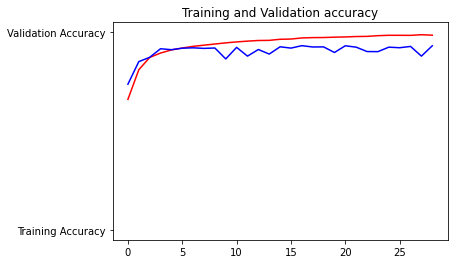

Text(0.5, 1.0, 'Training and Validation loss')

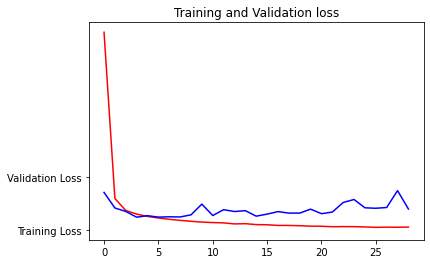

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and Validation accuracy')
fig = plt.gcf()
plt.show()
fig.savefig('xray_resnet50v2_1-acc.png')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and Validation loss')

#plt.savefig('xray_resnet50v2_1-loss.png',bbox_inches='tight')

In [ ]:
test_datagen = ImageDataGenerator(
    rescale = 1./255.)


test_generator = val_datagen.flow_from_directory(
    test_dir,
    batch_size = 64,
    class_mode = 'categorical',
    target_size=(299,299)
)

Found 2119 images belonging to 4 classes.


In [ ]:
score_evaluation = model.evaluate_generator(test_generator, 20)
print("Accuracy",score_evaluation[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy 0.9273437261581421


In [ ]:
!pip install -q pyyaml h5py

In [ ]:
print(tf.version.VERSION)

2.5.0


In [ ]:
!python3 --version

Python 3.7.10


In [ ]:
from google.colab import files
from keras.preprocessing import image
import cv2

In [ ]:

width, height = 299,299

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  img = cv2.imread(fn)

print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
#width = int(img.shape[1] * scale_percent / 100)
#height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
img = np.reshape(resized,[1,299,299,3])  
#img = cv2.imdecode(np.frombuffer(uploaded[fn]), np.uint8)
#uploaded = image.load_img(uploaded, target_size = (299,299))
#uploaded = image.img_to_array(uploaded)
#uploaded = np.expand_dims(uploaded, axis = 0)
print(uploaded.keys())
#model.predict(uploaded)
print(type(uploaded[fn]))

img = img/255.

pred = model.predict(img)
print(pred)
print(np.argmax(pred,axis=1))

Saving lung-opacity-2.png to lung-opacity-2 (1).png
User uploaded file "lung-opacity-2.png" with length 95457 bytes
Original Dimensions :  (815, 747, 3)
Resized Dimensions :  (299, 299, 3)
dict_keys(['lung-opacity-2.png'])
<class 'bytes'>
[[9.9923611e-01 6.8646396e-04 7.7430734e-05 8.4716617e-12]]
[0]


In [ ]:
model.save_weights('xray_resnet50v2_weights.h5')

In [ ]:
model_json = model.to_json()
with open("xray_resnet50v2_1.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
